In [174]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [175]:
# sns.set(rc={'figure.figsize':(10,10)})
df= pd.read_csv("Data_miniproject.csv")
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


# EDA

In [176]:
df.dtypes

Cost       float64
Weight     float64
Weight1    float64
Length     float64
Height     float64
Width      float64
dtype: object

In [177]:
df.shape

(159, 6)

In [178]:
df.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

In [179]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Dependent Variable Cost cannot be zero. Observtions related to this should be removed to avoid bias

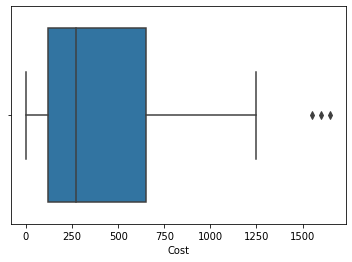

In [180]:
sns.boxplot(df['Cost'])


Also, box plot shows cost has outliers. So, remove observations with these outliers to avoid bias

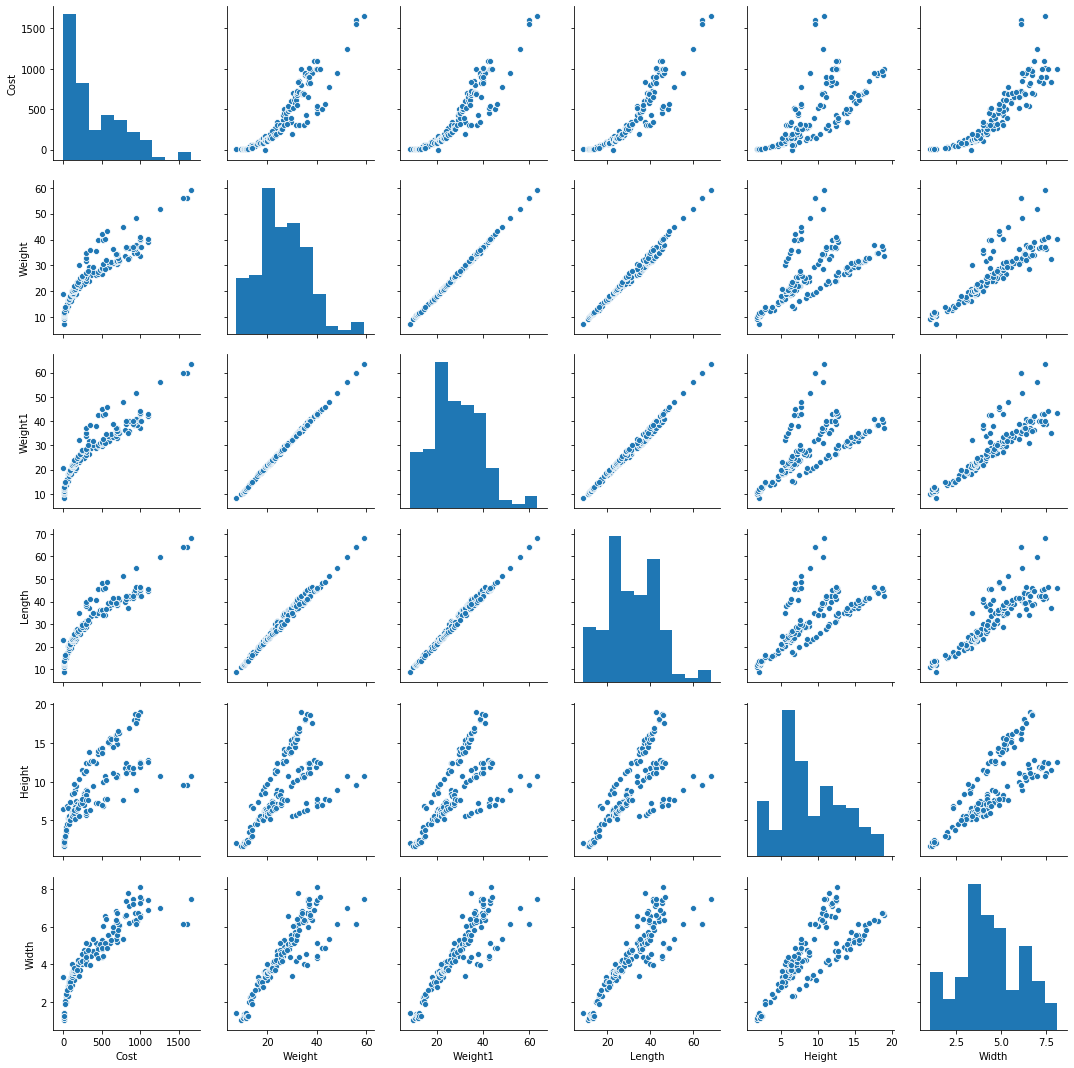

In [181]:
sns.pairplot(df)

In [182]:
df = df[ (df.Cost < 1250) &  (df.Cost >0)] 

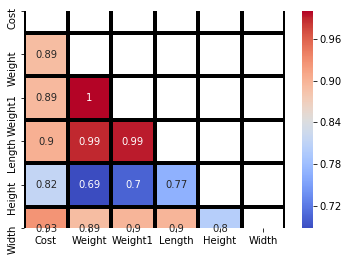

In [183]:

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True , mask=matrix)

Due to high correlation between Weight and Weight1, drop weight1.
Similary, due to high correlation between Weight and Length, drop Length.

In [184]:
# Determine dependent and independent varibles
x = df.loc[:,["Weight","Height","Width"]]
y = df["Cost"]

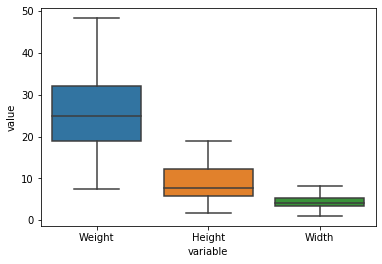

In [185]:
sns.boxplot(x="variable", y="value", data=pd.melt(x))
plt.show()

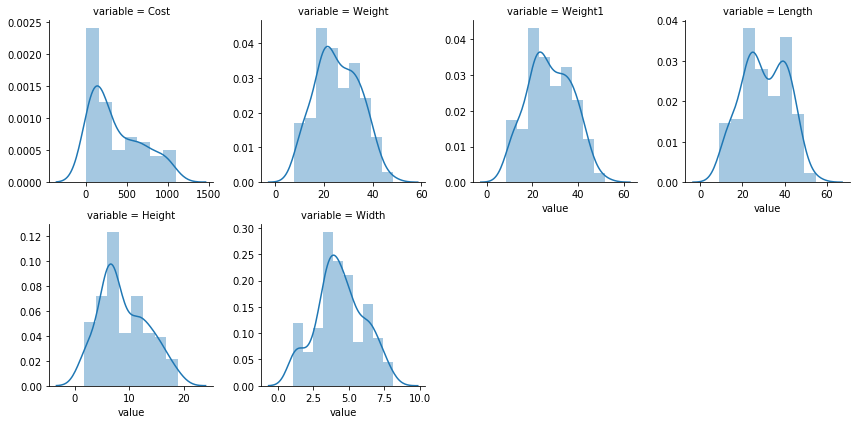

In [186]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

# Linear Regression using sklearn built in method

In [187]:
#Split data into training and testing datasets 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [188]:
def LinearRegression_BuiltIn(x,y,x_test,y_test):
    #Build linear regression model
    model = LinearRegression()
    # Train the model, using training data set
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Intercept =', model.intercept_)
    print('Coefficients = ', model.coef_)
    print("Mean squared error(MSE) = %.2f" %   mean_squared_error(y_test, y_pred))
    print("Root Mean squared error(RMSE) = %.2f" % math.sqrt(  mean_squared_error(y_test, y_pred)))
    print('Variance score = %.2f' % r2_score(y_test, y_pred))

In [189]:
LinearRegression_BuiltIn(x_train, y_train, x_test, y_test)

Intercept = 369.6105691056911
Coefficients =  [ 95.2406242   66.44701528 150.58174061]
Mean squared error(MSE) = 10863.83
Root Mean squared error(RMSE) = 104.23
Variance score = 0.89


# Stochastic Linear Regression using sklearn built in method

In [190]:
def SGDRegression_BuiltIn(x,y,x_test,y_test):
    clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    print ('Intercept = ', clf.intercept_)
    print ('Coefficients = ', clf.coef_)
    print("Mean squared error(MSE) = %.2f" %   mean_squared_error(y_test, y_pred))
    print("Root Mean squared error(RMSE) = %.2f" % math.sqrt(  mean_squared_error(y_test, y_pred)))
    print('Variance score(R2) = %.2f' % r2_score(y_test, y_pred))

In [191]:
SGDRegression_BuiltIn(x_train, y_train, x_test, y_test)

Intercept =  [369.67017552]
Coefficients =  [107.38683393  72.4441227  133.14753722]
Mean squared error(MSE) = 10605.61
Root Mean squared error(RMSE) = 102.98
Variance score(R2) = 0.89


# Gradient Descent 

In [192]:
#Common functions used across GD, SGD and MiniBatchGD

predict = lambda X, weights : X.dot(weights) 

def predict_and_print_results(theta, cost, x_test, y_test):
    print('Theta0: {:0.3f},\nTheta1: {:0.3f},\nTheta2: {:0.3f},\nTheta3: {:0.3f} '.format(theta[0][0],theta[1][0],theta[2][0],theta[3][0]  ))
    print('Final cost/MSE:  {:0.3f}'.format(cost))
    print("Training - RMSE = %.2f" % math.sqrt(  cost ))
    
    weights = np.array([ theta[0][0],theta[1][0],theta[2][0],theta[3][0] ])
    y_pred = np.zeros(len(y_test))
    mse = 0
    x_test_calc = np.c_[np.ones((len(x_test),1)),x_test]
    for idx,val in enumerate(x_test_calc):
        y_pred[idx] = predict(val, weights)
        
    print("Test - Mean squared error(MSE) = %.2f" %   mean_squared_error(y_test, y_pred))
    print("Test - Root Mean squared error(RMSE) = %.2f" % math.sqrt(  mean_squared_error(y_test, y_pred)))
    print('Test - Variance score(R2) = %.2f' % r2_score(y_test, y_pred))

def  calculate_cost(theta,X,y):
    '''
    Calculates the cost for given X and Y. 
    
    theta = Vector of thetas 
    X     = Row of X's np.zeros((m,j))
    y     = Actual y's np.zeros((m,1))
    
    where:
        j is the no of features
        m is the no of observations
    '''
    
    m = len(y)  #the no. of observations
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [193]:
#implementation for Gradient descent   
    
def step_gradient(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X = Matrix of X 
    y = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
     
    cost_history = np.zeros(iterations)
     
    for it in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        cost_history[it]  = calculate_cost(theta,X,y)
        
    return theta, cost_history  

def gradient_descent(x,y,x_test,y_test):

    lr =0.001
    n_iter = 10000

    theta = np.random.randn(x.shape[1] + 1,1)

    x_b = np.c_[np.ones((len(x),1)),x]
 
    y = np.array(y).reshape(len(y),1)

    theta,cost_history = step_gradient(x_b,y ,theta,lr,n_iter)

    predict_and_print_results(theta, cost_history[-1], x_test, y_test)
    

In [194]:
gradient_descent(x_train, y_train, x_test, y_test)

Theta0: 369.594,
Theta1: 107.015,
Theta2: 71.850,
Theta3: 134.183 
Final cost/MSE:  4915.711
Training - RMSE = 70.11
Test - Mean squared error(MSE) = 10619.84
Test - Root Mean squared error(RMSE) = 103.05
Test - Variance score(R2) = 0.89


# Stochastic Gradient Descent 

In [195]:
# Stochastic Gradient Descent 
def stocashtic_gradient_step(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
     
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calculate_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

def stochastic_gradient_descent(x,y,x_test,y_test):

    lr =0.001
    n_iter = 10000

    theta = np.random.randn(x.shape[1] + 1,1)

    x_b = np.c_[np.ones((len(x),1)),x]
 
    y = np.array(y).reshape(len(y),1)

    theta,cost_history = stocashtic_gradient_step(x_b,y ,theta,lr,n_iter)

    predict_and_print_results(theta, cost_history[-1], x_test, y_test)
  

In [196]:
stochastic_gradient_descent(x_train, y_train, x_test, y_test)

Theta0: 369.028,
Theta1: 106.859,
Theta2: 71.839,
Theta3: 134.206 
Final cost/MSE:  425543.396
Training - RMSE = 652.34
Test - Mean squared error(MSE) = 10614.31
Test - Root Mean squared error(RMSE) = 103.03
Test - Variance score(R2) = 0.89


# Mini Batch Gradient Descent 

In [197]:
def minibatch_gradient_descent_step(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calculate_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

def minibatch_gradient_descent(x,y,x_test,y_test):

    lr =0.001
    n_iter = 10000

    theta = np.random.randn(x.shape[1] + 1,1)
 
    y = np.array(y).reshape(len(y),1)

    theta,cost_history = minibatch_gradient_descent_step(x,y ,theta,lr,n_iter)

    predict_and_print_results(theta, cost_history[-1], x_test, y_test)
  

In [198]:
minibatch_gradient_descent(x_train, y_train, x_test, y_test)

Theta0: 369.595,
Theta1: 106.675,
Theta2: 72.011,
Theta3: 134.362 
Final cost/MSE:  43266.436
Training - RMSE = 208.01
Test - Mean squared error(MSE) = 10619.77
Test - Root Mean squared error(RMSE) = 103.05
Test - Variance score(R2) = 0.89
